In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

salary_query = "SELECT yearID, sum(salary) as total_payroll FROM Salaries WHERE lgID == 'AL' GROUP BY yearID"

team_salaries = pd.read_sql(salary_query, conn)
team_salaries.head()

,yearID,total_payroll
0,1985,134401120.0
1,1986,157716444.0
2,1987,136088747.0
3,1988,157049812.0
4,1989,188771688.0


In [20]:
# PROBLEM 1:
third_query = "SELECT s.teamID, s.yearID, sum(s.salary) as total_payroll, (t.W*100.0/t.G) as Winning_Percentage, t.W as Wins, t.G as Games FROM Salaries s INNER JOIN Teams t ON s.yearID = t.yearID AND s.teamID = t.teamID GROUP BY s.teamID, s.yearID ORDER BY s.teamID"
merged = pd.read_sql(third_query, conn)
merged

# I inner joined to get rid of missing data. 
# Table description: the table shows each team, each year, and that team's total payroll and winning percentage


,teamID,yearID,total_payroll,Winning_Percentage,Wins,Games
0,ANA,1997,31135472.0,51.851852,84,162
1,ANA,1998,41281000.0,52.469136,85,162
2,ANA,1999,55388166.0,43.209877,70,162
3,ANA,2000,51464167.0,50.617284,82,162
4,ANA,2001,47535167.0,46.296296,75,162
5,ANA,2002,61721667.0,61.111111,99,162
6,ANA,2003,79031667.0,47.530864,77,162
7,ANA,2004,100534667.0,56.790123,92,162
8,ARI,1998,32347000.0,40.123457,65,162
9,ARI,1999,68703999.0,61.728395,100,162


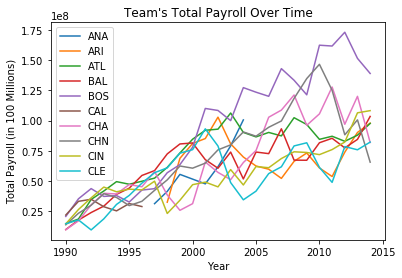

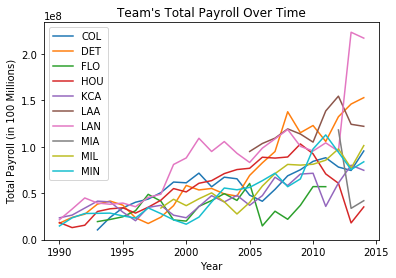

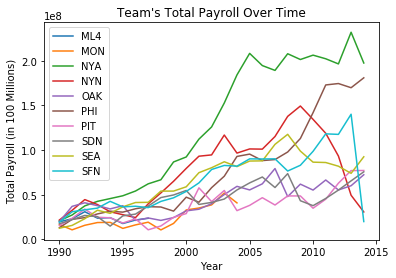

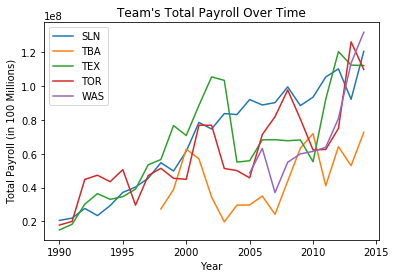

In [3]:
#PROBLEM 2
teams=merged.iloc[:,0].values
teams = merged['teamID'].drop_duplicates()
i = 0
for team in teams:
    i+=1
    df=pd.DataFrame({'yearID':range(1990,2015)})
    cols=merged[['yearID','teamID','total_payroll']]
    t=cols.groupby(['teamID']).get_group(team)
    t=df.merge(t, how = "left", left_on = ['yearID'], right_on = ['yearID'])
    plt.plot(t['yearID'],t['total_payroll'], label = team)
    plt.xlabel("Year")
    plt.ylabel("Total Payroll (in 100 Millions)")
    plt.title("Team's Total Payroll Over Time")
    leg = plt.legend()
    if (i == 10):
        plt.show()
        i = 0
plt.show()

# QUESTION 1:
# It is clear that over time, team's payroll increases
# Looking at the graphs, it looks like most teams start around the same payroll, but as time increases, teams payrolls
# spread out more with the Yankees surpassing 200 Million while some teams are still under 100 Million

# Plot description: I separated plots into chunks of ten teams. That way you can see a comparison with other teams
# but it is still readable, whereas I fell a plot of all teams together wasn't. It plots each team's payroll over
# time from 1990 to 2015

Text(0.5, 1.0, 'Mean Payroll Over Time')

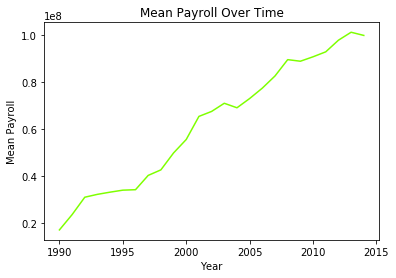

In [4]:
#PROBLEM 3
new_merged = merged[merged.yearID >= 1990]
mean_payroll = (new_merged[["yearID","total_payroll"]].groupby("yearID")).mean()
plt.plot(mean_payroll, color = "chartreuse")
plt.xlabel("Year")
plt.ylabel("Mean Payroll")
plt.title("Mean Payroll Over Time")

# plot description: this shows the average payroll per year from 1990 to 2015. As you can see, it increases pretty
# linearly over time

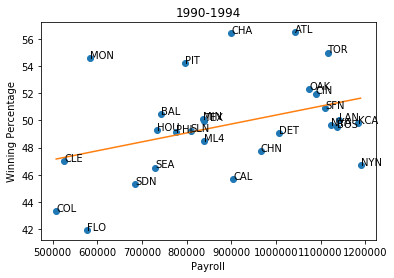

In [5]:
#PROBLEM 4:
q1 = "SELECT s.teamID, s.yearID, sum(s.salary)/count(s.salary) as Payroll, (t.W*100.0/t.G) as Winning_Percentage FROM Salaries s INNER JOIN Teams t ON s.yearID = t.yearID AND s.teamID = t.teamID GROUP BY s.teamID, s.yearID ORDER BY s.teamID"
rq = pd.read_sql(q1, conn)

bins = [1990,1995,2000,2005,2010,2015]
cols = ['1990-1994','1995-1999','2000-2004','2005-2009','2010-2014']
rq['bins'] = pd.cut(rq['yearID'],bins,right=False, labels=cols)

grouped = rq.groupby('bins')

group1 = grouped.get_group('1990-1994')
group2 = grouped.get_group('1995-1999')
group3 = grouped.get_group('2000-2004')
group4 = grouped.get_group('2005-2009')
group5 = grouped.get_group('2010-2014')

group1 = group1.drop(['yearID'],1)
group1 = group1.groupby(['teamID']).mean()
x1=group1['Payroll'].values
y1=group1['Winning_Percentage'].values
line=np.polyfit(x=x1,y=y1,deg=1)
f=np.poly1d(line)
x2 = np.linspace(x1.min(), x1.max(), 100)
y2 = f(x2)
plt.plot(x1, y1,'o',x2,y2)
plt.xlabel("Payroll")
plt.ylabel("Winning Percentage")
plt.title("1990-1994")
for i, name in enumerate(group1.index):
    plt.annotate(name, (x1[i],y1[i]))

# plot desctiption: shows each team's average payroll and winning percentage for the years in the title
# The orange line in the line of best fit

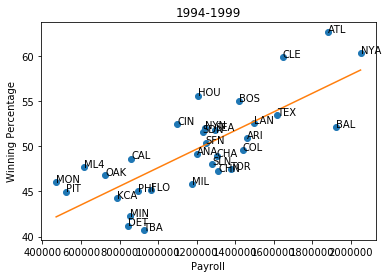

In [6]:
group2 = group2.drop(['yearID'],1)
group2 = group2.groupby(['teamID']).mean()
x1=group2['Payroll'].values
y1=group2['Winning_Percentage'].values
line=np.polyfit(x=x1,y=y1,deg=1)
f=np.poly1d(line)
x2 = np.linspace(x1.min(), x1.max(), 100)
y2 = f(x2)
plt.plot(x1, y1,'o',x2,y2)
plt.xlabel("Payroll")
plt.ylabel("Winning Percentage")
plt.title("1994-1999")
for i, name in enumerate(group2.index):
    plt.annotate(name, (x1[i],y1[i]))

# plot desctiption: shows each team's average payroll and winning percentage for the years in the title
# The orange line in the line of best fit

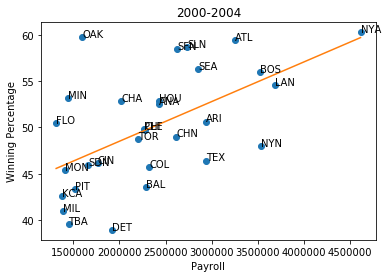

In [7]:
group3 = group3.drop(['yearID'],1)
group3 = group3.groupby(['teamID']).mean()
x1=group3['Payroll'].values
y1=group3['Winning_Percentage'].values
line=np.polyfit(x=x1,y=y1,deg=1)
f=np.poly1d(line)
x2 = np.linspace(x1.min(), x1.max(), 100)
y2 = f(x2)
plt.plot(x1, y1,'o',x2,y2)
plt.xlabel("Payroll")
plt.ylabel("Winning Percentage")
plt.title("2000-2004")
for i, name in enumerate(group3.index):
    plt.annotate(name, (x1[i],y1[i]))
    
# plot desctiption: shows each team's average payroll and winning percentage for the years in the title
# The orange line in the line of best fit

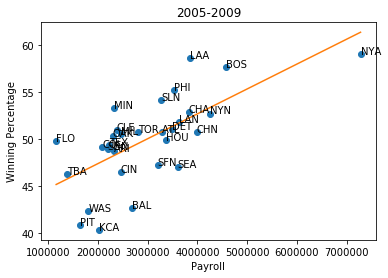

In [8]:
group4 = group4.drop(['yearID'],1)
group4 = group4.groupby(['teamID']).mean()
x1=group4['Payroll'].values
y1=group4['Winning_Percentage'].values
line=np.polyfit(x=x1,y=y1,deg=1)
f=np.poly1d(line)
x2 = np.linspace(x1.min(), x1.max(), 100)
y2 = f(x2)
plt.plot(x1, y1,'o',x2,y2)
plt.xlabel("Payroll")
plt.ylabel("Winning Percentage")
plt.title("2005-2009")
for i, name in enumerate(group4.index):
    plt.annotate(name, (x1[i],y1[i]))

# plot desctiption: shows each team's average payroll and winning percentage for the years in the title
# The orange line in the line of best fit

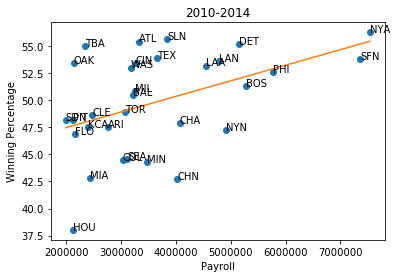

In [9]:
group5 = group5.drop(['yearID'],1)
group5 = group5.groupby(['teamID']).mean()
x1=group5['Payroll'].values
y1=group5['Winning_Percentage'].values
line=np.polyfit(x=x1,y=y1,deg=1)
f=np.poly1d(line)
x2 = np.linspace(x1.min(), x1.max(), 100)
y2 = f(x2)
plt.plot(x1, y1,'o',x2,y2)
plt.xlabel("Payroll")
plt.ylabel("Winning Percentage")
plt.title("2010-2014")
for i, name in enumerate(group5.index):
    plt.annotate(name, (x1[i],y1[i]))

# QUESTION 2:   
# As we might expect, the line of best fit shows a positive correlation between winning percentage and payroll for 
# each period. This means that as a team spends more money on it's players, they are expected to win more games.
# This is evidences by my New York Yankees. They have the highest payroll during the 2nd-5th group periods. During
# these periods, they have a winning percentage right around where the line of best fit suggests. A notable outlier
# would be the Oakland Athletics. The team's "Moneyball" season was in 2002, and the data backs it up. During
# the 2000-2004 period, the team is 2nd in winning percentage, yet in the bottom tier when it comes to payroll.

# plot desctiption: shows each team's average payroll and winning percentage for the years in the title
# The orange line in the line of best fit

In [10]:
#PROBLEM 5:
mean_payroll = (rq.groupby('yearID')).mean()
mean_payroll = mean_payroll.drop('Winning_Percentage',1)
mean_payroll.columns = ['mean_payroll']

std = (rq.groupby('yearID')).std()
std = std.drop('Winning_Percentage',1)
std.columns = ['std']

In [11]:
s_p = []
for row in range(len(rq)):
    s_p.append((rq.at[row,'Payroll'] - mean_payroll.at[rq.at[row,"yearID"],'mean_payroll']) / std.at[rq.at[row,"yearID"],'std'])
rq["standardized_payroll"] = s_p
rq

# plot desctiption: adds the standardized payroll to the original table. standardized payroll is the 
# (team's payroll - the year's mean payroll) / (the year's payroll's satandard deviation.)


,teamID,yearID,Payroll,Winning_Percentage,bins,standardized_payroll
0,ANA,1997,1.004370e+06,51.851852,1995-1999,-0.528661
1,ANA,1998,1.214147e+06,52.469136,1995-1999,-0.168201
2,ANA,1999,1.384704e+06,43.209877,1995-1999,-0.181448
3,ANA,2000,1.715472e+06,50.617284,2000-2004,-0.362224
4,ANA,2001,1.584506e+06,46.296296,2000-2004,-0.856538
5,ANA,2002,2.204345e+06,61.111111,2000-2004,-0.221608
6,ANA,2003,2.927099e+06,47.530864,2000-2004,0.339209
7,ANA,2004,3.723506e+06,56.790123,2000-2004,1.087913
8,ARI,1998,8.985278e+05,40.123457,1995-1999,-0.787416
9,ARI,1999,2.020706e+06,61.728395,1995-1999,0.777237


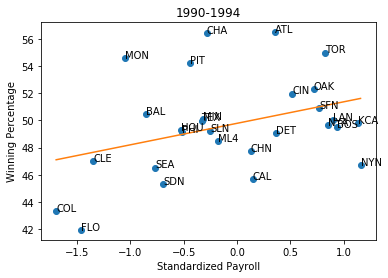

In [12]:
#PROBLEM 6:
bins = [1990,1995,2000,2005,2010,2015]
cols = ['1990-1994','1995-1999','2000-2004','2005-2009','2010-2014']
rq['bins'] = pd.cut(rq['yearID'],bins,right=False, labels=cols)

grouped = rq.groupby('bins')

group1 = grouped.get_group('1990-1994')
group2 = grouped.get_group('1995-1999')
group3 = grouped.get_group('2000-2004')
group4 = grouped.get_group('2005-2009')
group5 = grouped.get_group('2010-2014')

group1 = group1.drop(['yearID'],1)
group1 = group1.groupby(['teamID']).mean()
x1=group1['standardized_payroll'].values
y1=group1['Winning_Percentage'].values
line=np.polyfit(x=x1,y=y1,deg=1)
f=np.poly1d(line)
x2 = np.linspace(x1.min(), x1.max(), 100)
y2 = f(x2)
plt.plot(x1, y1,'o',x2,y2)
plt.xlabel("Standardized Payroll")
plt.ylabel("Winning Percentage")
plt.title("1990-1994")
for i, name in enumerate(group1.index):
    plt.annotate(name, (x1[i],y1[i]))
    
# plot description: shows each team's standardized payroll and winning percentage of the period of years in the title
# The orange line in the line of best fit

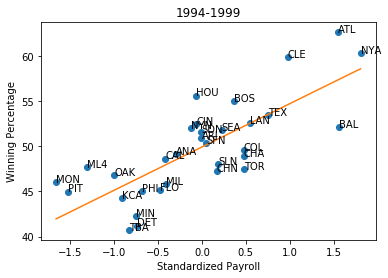

In [13]:
group2 = group2.drop(['yearID'],1)
group2 = group2.groupby(['teamID']).mean()
x1=group2['standardized_payroll'].values
y1=group2['Winning_Percentage'].values
line=np.polyfit(x=x1,y=y1,deg=1)
f=np.poly1d(line)
x2 = np.linspace(x1.min(), x1.max(), 100)
y2 = f(x2)
plt.plot(x1, y1,'o',x2,y2)
plt.xlabel("Standardized Payroll")
plt.ylabel("Winning Percentage")
plt.title("1994-1999")
for i, name in enumerate(group2.index):
    plt.annotate(name, (x1[i],y1[i]))

# plot description: shows each team's standardized payroll and winning percentage of the period of years in the title
# The orange line in the line of best fit

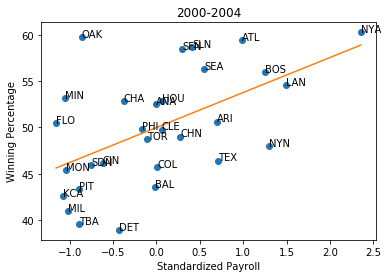

In [14]:
group3 = group3.drop(['yearID'],1)
group3 = group3.groupby(['teamID']).mean()
x1=group3['standardized_payroll'].values
y1=group3['Winning_Percentage'].values
line=np.polyfit(x=x1,y=y1,deg=1)
f=np.poly1d(line)
x2 = np.linspace(x1.min(), x1.max(), 100)
y2 = f(x2)
plt.plot(x1, y1,'o',x2,y2)
plt.xlabel("Standardized Payroll")
plt.ylabel("Winning Percentage")
plt.title("2000-2004")
for i, name in enumerate(group3.index):
    plt.annotate(name, (x1[i],y1[i]))

# plot description: shows each team's standardized payroll and winning percentage of the period of years in the title
# The orange line in the line of best fit

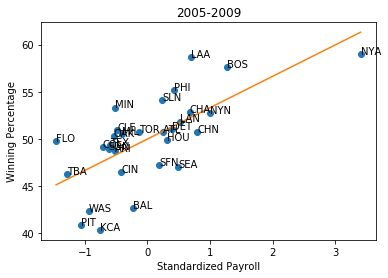

In [15]:
group4 = group4.drop(['yearID'],1)
group4 = group4.groupby(['teamID']).mean()
x1=group4['standardized_payroll'].values
y1=group4['Winning_Percentage'].values
line=np.polyfit(x=x1,y=y1,deg=1)
f=np.poly1d(line)
x2 = np.linspace(x1.min(), x1.max(), 100)
y2 = f(x2)
plt.plot(x1, y1,'o',x2,y2)
plt.xlabel("Standardized Payroll")
plt.ylabel("Winning Percentage")
plt.title("2005-2009")
for i, name in enumerate(group4.index):
    plt.annotate(name, (x1[i],y1[i]))

# plot description: shows each team's standardized payroll and winning percentage of the period of years in the title
# The orange line in the line of best fit

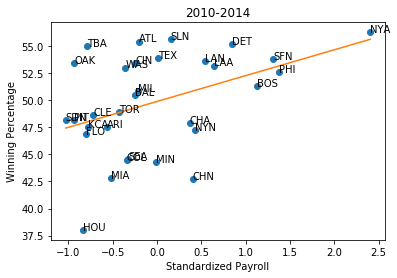

In [16]:
group5 = group5.drop(['yearID'],1)
group5 = group5.groupby(['teamID']).mean()
x1=group5['standardized_payroll'].values
y1=group5['Winning_Percentage'].values
line=np.polyfit(x=x1,y=y1,deg=1)
f=np.poly1d(line)
x2 = np.linspace(x1.min(), x1.max(), 100)
y2 = f(x2)
plt.plot(x1, y1,'o',x2,y2)
plt.xlabel("Standardized Payroll")
plt.ylabel("Winning Percentage")
plt.title("2010-2014")
for i, name in enumerate(group5.index):
    plt.annotate(name, (x1[i],y1[i]))

# QUESTION 3:
# All the graphs are pretty much the same from the previous scatter plots. The difference is the x-axis is 
# standardized payroll instead of actual payroll, so it will be easier to compare across bins

# plot description: shows each team's standardized payroll and winning percentage of the period of years in the title
# The orange line in the line of best fit

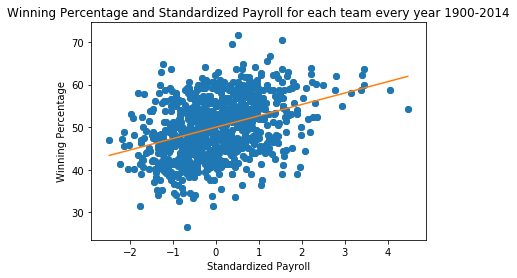

In [17]:
#PROBLEM 7:
new_rq = rq.drop(['yearID'],1)
x1=new_rq['standardized_payroll'].values
y1=new_rq['Winning_Percentage'].values
line=np.polyfit(x=x1,y=y1,deg=1)
f=np.poly1d(line)
x2 = np.linspace(x1.min(), x1.max(), 100)
y2 = f(x2)
plt.plot(x1, y1,'o',x2,y2)
plt.xlabel("Standardized Payroll")
plt.ylabel("Winning Percentage")
plt.title("Winning Percentage and Standardized Payroll for each team every year 1900-2014")
plt.scatter(new_rq['standardized_payroll'],new_rq['Winning_Percentage'])

# plot description: now that we have a standardized payroll, this plot combines the 5 previous plots into one.
# i.e. this plot graphs each team, for each period, and their winning percentage and standardized payroll.
# The orange line in the line of best fit

In [18]:
#PROBLEM 8:
efficiency = []
for row in range(len(rq)):
    efficiency.append((rq.at[row,"Winning_Percentage"]-(50+(2.5*rq.at[row,'standardized_payroll']))))
rq["Efficiency"] = efficiency
rq
# table description: this table now adds an efficiency columns. efficiency is expected wins minus actual wins
# we get expected wins from the line of best fit

,teamID,yearID,Payroll,Winning_Percentage,bins,standardized_payroll,Efficiency
0,ANA,1997,1.004370e+06,51.851852,1995-1999,-0.528661,3.173505
1,ANA,1998,1.214147e+06,52.469136,1995-1999,-0.168201,2.889640
2,ANA,1999,1.384704e+06,43.209877,1995-1999,-0.181448,-6.336503
3,ANA,2000,1.715472e+06,50.617284,2000-2004,-0.362224,1.522845
4,ANA,2001,1.584506e+06,46.296296,2000-2004,-0.856538,-1.562358
5,ANA,2002,2.204345e+06,61.111111,2000-2004,-0.221608,11.665131
6,ANA,2003,2.927099e+06,47.530864,2000-2004,0.339209,-3.317158
7,ANA,2004,3.723506e+06,56.790123,2000-2004,1.087913,4.070341
8,ARI,1998,8.985278e+05,40.123457,1995-1999,-0.787416,-7.908002
9,ARI,1999,2.020706e+06,61.728395,1995-1999,0.777237,9.785302


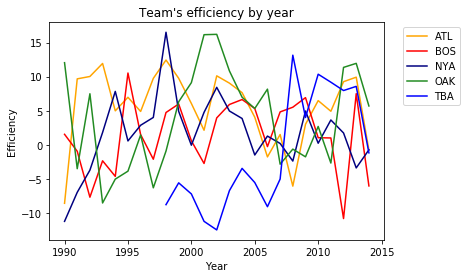

In [19]:
rq = rq.loc[rq['teamID'].isin(['OAK', 'BOS', 'NYA', 'ATL', 'TBA'])].sort_values(['teamID', 'yearID'], ascending = [True, True])
rq = rq[rq.yearID >= 1990]
atl = rq[rq.teamID == "ATL"]
plt.plot(atl['yearID'],atl['Efficiency'], c= 'orange')
bos = rq[rq.teamID == "BOS"]
plt.plot(bos['yearID'],bos['Efficiency'],c= 'red')
nya = rq[rq.teamID == "NYA"]
plt.plot(nya['yearID'],nya['Efficiency'], c ='navy')
oak = rq[rq.teamID == "OAK"]
plt.plot(oak['yearID'],oak['Efficiency'], c = 'forestgreen')
tba = rq[rq.teamID == "TBA"]
plt.plot(tba['yearID'],tba['Efficiency'], c = 'blue')
plt.legend(["ATL", "BOS",'NYA','OAK', 'TBA'],bbox_to_anchor=(1.04,1))
plt.xlabel("Year")
plt.ylabel("Efficiency")
plt.title("Team's efficiency by year")
plt.show()

# QUESTION 4:
# You can clearly see in this graph how out of the ordinary Oakland early 2000 run was. Something I can see in this
# graph but not in previous ones is that the teams efficiecny are a lot more volatile then I expected. 
# They yankees have an extemely high efficiency one year only to be around average the next.

# plot description: shows 5 select teams, and their efficiency from 1990-2015